<a href="https://colab.research.google.com/github/arjunsur1/Artificial-Neural-Networks/blob/master/CNN-%20Image%20Classifier-%20Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Importing Libraries**

In [77]:
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.12.0


In [0]:
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
import matplotlib.pylab as plt

## Importing Fashion MNIST Data
The Dataset consists of 70000 images with 28*28 greyscaled images spread across 10 categories
Training set- 60000
Test set- 10000

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train,y_train), (X_test, y_test) = fashion_mnist.load_data()

In [80]:
X_train.shape

(60000, 28, 28)

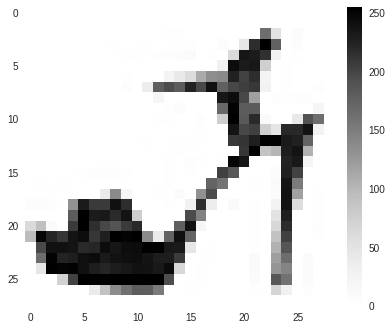

In [81]:
plt.figure()
plt.imshow(X_train[9])
plt.colorbar()
plt.grid(False)

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
# input image dimensions
img_x, img_y = 28, 28

## Reshaping the image matrix

In [0]:
train_images = X_train.reshape(X_train.shape[0], img_x, img_y, 1)
test_images = X_test.reshape(X_test.shape[0], img_x, img_y, 1)
input_shape = (img_x, img_y, 1)

In [85]:
train_images.shape

(60000, 28, 28, 1)

In [0]:
# convert the data to the right type
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

In [0]:
num_classes = 10

## Converting multi labels into binary class matrices

In [0]:
# convert class vectors to binary class matrices - this is for use in the
# categorical_crossentropy loss below
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

In [89]:
train_images.shape

(60000, 28, 28, 1)

## Convolutional 2D - Maxpooling- Dropout- Dense Layer implementation keras

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [91]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 8s 131us/step - loss: 0.5185 - acc: 0.8177
Epoch 2/5
60000/60000 [==============================] - 7s 121us/step - loss: 0.3380 - acc: 0.8793
Epoch 3/5
60000/60000 [==============================] - 7s 122us/step - loss: 0.2864 - acc: 0.8961
Epoch 4/5
60000/60000 [==============================] - 7s 122us/step - loss: 0.2600 - acc: 0.9053
Epoch 5/5
60000/60000 [==============================] - 7s 122us/step - loss: 0.2347 - acc: 0.9154


## Accuracy - Model 1- 91.3%

In [92]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 113us/step
Test accuracy: 0.913


## Conv 2D- Maxpooling- Dense layer without Dropout - Keras

In [0]:
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model2.add(Conv2D(64, (5, 5), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(1000, activation='relu'))
model2.add(Dense(num_classes, activation='softmax'))

model2.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [94]:
model2.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 5s 88us/step - loss: 0.4973 - acc: 0.8204
Epoch 2/5
60000/60000 [==============================] - 5s 79us/step - loss: 0.3156 - acc: 0.8856
Epoch 3/5
60000/60000 [==============================] - 5s 79us/step - loss: 0.2674 - acc: 0.9027
Epoch 4/5
60000/60000 [==============================] - 5s 79us/step - loss: 0.2348 - acc: 0.9131
Epoch 5/5
60000/60000 [==============================] - 5s 79us/step - loss: 0.2081 - acc: 0.9232


## Accuracy- Model 2- 90.73%

In [95]:
test_loss_2, test_acc_2 = model2.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc_2)

10000/10000 [==============================] - 1s 102us/step
Test accuracy: 0.9073


## Prediction and Classification report- Model 1

In [0]:
import numpy as np
#get the predictions for the test data
predicted_classes = model.predict_classes(test_images)


In [0]:
p = predicted_classes[:10000]
y = y_test[:10000]
correct = np.nonzero(p==y)[0]
incorrect = np.nonzero(p!=y)[0]

In [101]:
print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 9130
Incorrect predicted classes: 870


In [0]:
from sklearn.metrics import classification_report

In [106]:
target_names = ["Class {} ({}) :".format(i,class_names[i]) for i in range(num_classes)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

                         precision    recall  f1-score   support

Class 0 (T-shirt/top) :       0.87      0.87      0.87      1000
    Class 1 (Trouser) :       1.00      0.97      0.98      1000
   Class 2 (Pullover) :       0.89      0.84      0.87      1000
      Class 3 (Dress) :       0.89      0.94      0.91      1000
       Class 4 (Coat) :       0.86      0.86      0.86      1000
     Class 5 (Sandal) :       0.99      0.98      0.98      1000
      Class 6 (Shirt) :       0.74      0.75      0.74      1000
    Class 7 (Sneaker) :       0.94      0.98      0.96      1000
        Class 8 (Bag) :       0.98      0.98      0.98      1000
 Class 9 (Ankle boot) :       0.98      0.96      0.97      1000

            avg / total       0.91      0.91      0.91     10000



## Correctly Identified Classes

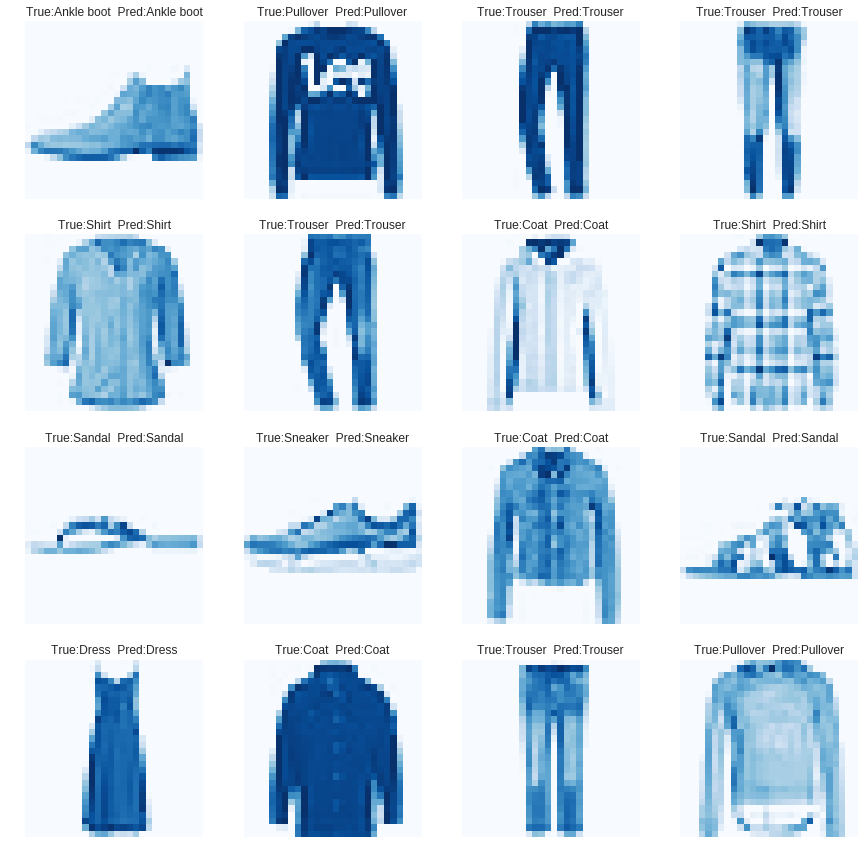

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def plot_images(data_index,cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(4,4, figsize=(15,15))

    for i, indx in enumerate(data_index[:16]):
        ax[i//4, i%4].imshow(X_test[indx].reshape(img_x, img_y), cmap=cmap)
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title("True:{}  Pred:{}".format(class_names[y_test[indx]],class_names[predicted_classes[indx]]))
    plt.show()    
    
plot_images(correct, "Blues")

## Incorrectly Identified Classes

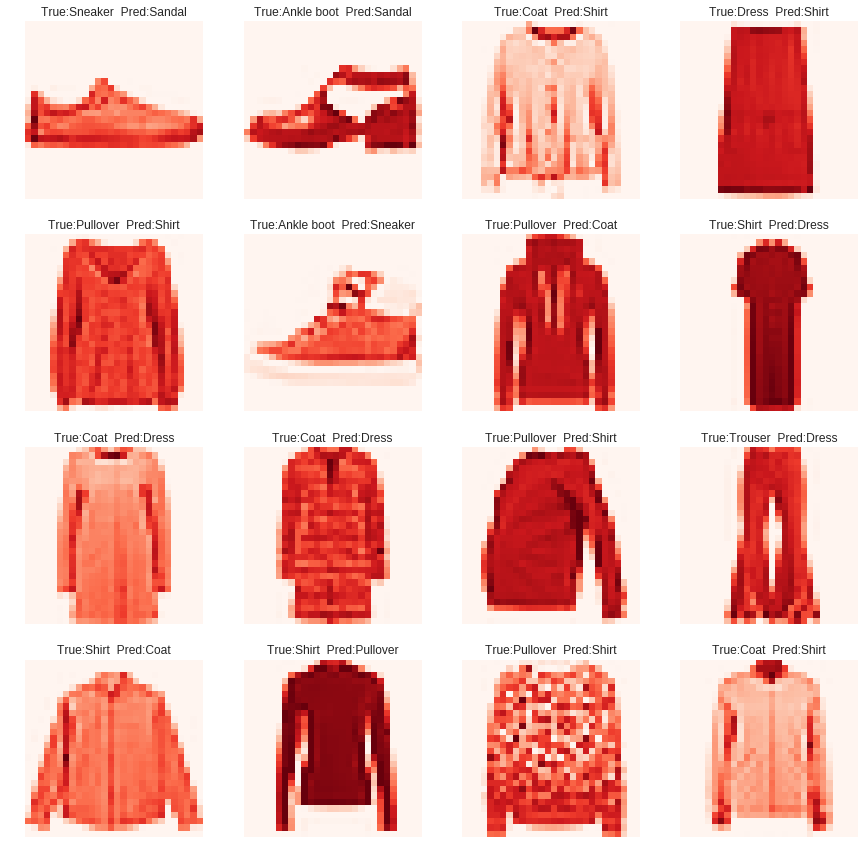

In [116]:
plot_images(incorrect, "Reds")